You need to work on a popular Fashion MNIST dataset for this HW. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. 

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

Now, it's time to load the dataset

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [4]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

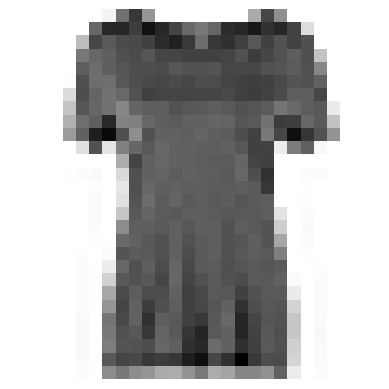

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [6]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


## Preprcessing the data

In [8]:
# Normalize the image data to range [0, 1]
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Flatten the 28x28 images into 784-length vectors
X_train_flat = X_train_norm.reshape(len(X_train_norm), -1)
X_test_flat = X_test_norm.reshape(len(X_test_norm), -1)

# For AUC metric (multi-class), we'll one-hot encode test labels
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=range(10))

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accuracy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of ten fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#  Task 1: Train and Evaluate Multiple Supervised Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score

### 1. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_flat, y_train)
y_pred_lr = lr.predict(X_test_flat)
y_prob_lr = lr.predict_proba(X_test_flat)

print("Logistic Regression:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred_lr, average='macro'), 4))
print("AUC (OvR):", round(roc_auc_score(y_test_binarized, y_prob_lr, multi_class='ovr'), 4))

Logistic Regression:
Accuracy: 0.8439
Precision (macro): 0.8428
AUC (OvR): 0.9834


C:\Users\17kin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_test_flat)
y_prob_knn = knn.predict_proba(X_test_flat)

print("K-Nearest Neighbors:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred_knn, average='macro'), 4))
print("AUC (OvR):", round(roc_auc_score(y_test_binarized, y_prob_knn, multi_class='ovr'), 4))

C:\Users\17kin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors:
Accuracy: 0.8541
Precision (macro): 0.8575
AUC (OvR): 0.9584


### 3. Support Vector Machine

In [12]:
from sklearn.svm import SVC

svm = SVC(probability=True)
# SVM is computationally expensive, so we use a smaller subset
svm.fit(X_train_flat[:10000], y_train[:10000])
y_pred_svm = svm.predict(X_test_flat)
y_prob_svm = svm.predict_proba(X_test_flat)

print("Support Vector Machine:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred_svm, average='macro'), 4))
print("AUC (OvR):", round(roc_auc_score(y_test_binarized, y_prob_svm, multi_class='ovr'), 4))

Support Vector Machine:
Accuracy: 0.8531
Precision (macro): 0.8527
AUC (OvR): 0.9861


### 4. Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_flat, y_train)
y_pred_rf = rf.predict(X_test_flat)
y_prob_rf = rf.predict_proba(X_test_flat)

print("Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision (macro):", round(precision_score(y_test, y_pred_rf, average='macro'), 4))
print("AUC (OvR):", round(roc_auc_score(y_test_binarized, y_prob_rf, multi_class='ovr'), 4))

Random Forest:
Accuracy: 0.8792
Precision (macro): 0.8781
AUC (OvR): 0.9895


### 5. MLP Neural Network

In [14]:
from tensorflow.keras import layers
import numpy as np

# ---------------- Build MLP Model ---------------- #
mlp = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ---------------- Train silently ---------------- 
mlp.fit(X_train_flat, y_train, epochs=15, batch_size=128, verbose=0)

# Evaluate
y_pred_probs = mlp.predict(X_test_flat, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
y_test_bin = label_binarize(y_test, classes=list(range(10)))
auc = roc_auc_score(y_test_bin, y_pred_probs, multi_class="ovr")

print("🔹 MLP Classifier:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"AUC (OvR): {auc:.4f}")

y_pred_mlp = y_pred
y_prob_mlp = y_pred_probs

C:\Users\17kin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 MLP Classifier:
Accuracy: 0.8849
Precision (macro): 0.8849
AUC (OvR): 0.9910


## Summary Table

In [15]:
import pandas as pd

summary = {
    "Logistic Regression": [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='macro'), roc_auc_score(y_test_binarized, y_prob_lr, multi_class='ovr')],
    "KNN": [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='macro'), roc_auc_score(y_test_binarized, y_prob_knn, multi_class='ovr')],
    "Random Forest": [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='macro'), roc_auc_score(y_test_binarized, y_prob_rf, multi_class='ovr')],
    "SVM": [accuracy_score(y_test, y_pred_svm), precision_score(y_test, y_pred_svm, average='macro'), roc_auc_score(y_test_binarized, y_prob_svm, multi_class='ovr')],
    "MLP": [accuracy_score(y_test, y_pred_mlp), precision_score(y_test, y_pred_mlp, average='macro'), roc_auc_score(y_test_binarized, y_prob_mlp, multi_class='ovr')]
}

summary_df = pd.DataFrame(summary, index=["Accuracy", "Precision (Macro)", "AUC (OvR)"]).T.round(4)
print(summary_df)

                     Accuracy  Precision (Macro)  AUC (OvR)
Logistic Regression    0.8439             0.8428     0.9834
KNN                    0.8541             0.8575     0.9584
Random Forest          0.8792             0.8781     0.9895
SVM                    0.8531             0.8527     0.9861
MLP                    0.8849             0.8849     0.9910


### Cross Validation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### 1. Cross-Validation for Random Forest

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_flat, y_train)

print("✅ Best Random Forest Params:", grid_rf.best_params_)
print("🔎 Best Cross-Validated Accuracy:", round(grid_rf.best_score_, 4))

✅ Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
🔎 Best Cross-Validated Accuracy: 0.881


### 2. Cross-Validation for SVM

In [18]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Reduce dataset size for SVM to avoid long training times
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_flat[:10000], y_train[:10000])

print("✅ Best SVM Params:", grid_svm.best_params_)
print("🔎 Best Cross-Validated Accuracy (subset):", round(grid_svm.best_score_, 4))

✅ Best SVM Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
🔎 Best Cross-Validated Accuracy (subset): 0.8701


### 3. Cross-Validation for MLP Classifier

In [19]:
param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=20), param_grid_mlp, cv=3, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(X_train_flat, y_train)

print("✅ Best MLP Params:", grid_mlp.best_params_)
print("🔎 Best Cross-Validated Accuracy:", round(grid_mlp.best_score_, 4))

✅ Best MLP Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant'}
🔎 Best Cross-Validated Accuracy: 0.8913


C:\Users\17kin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# Task2: Use the best model to predict your own fashion pieces

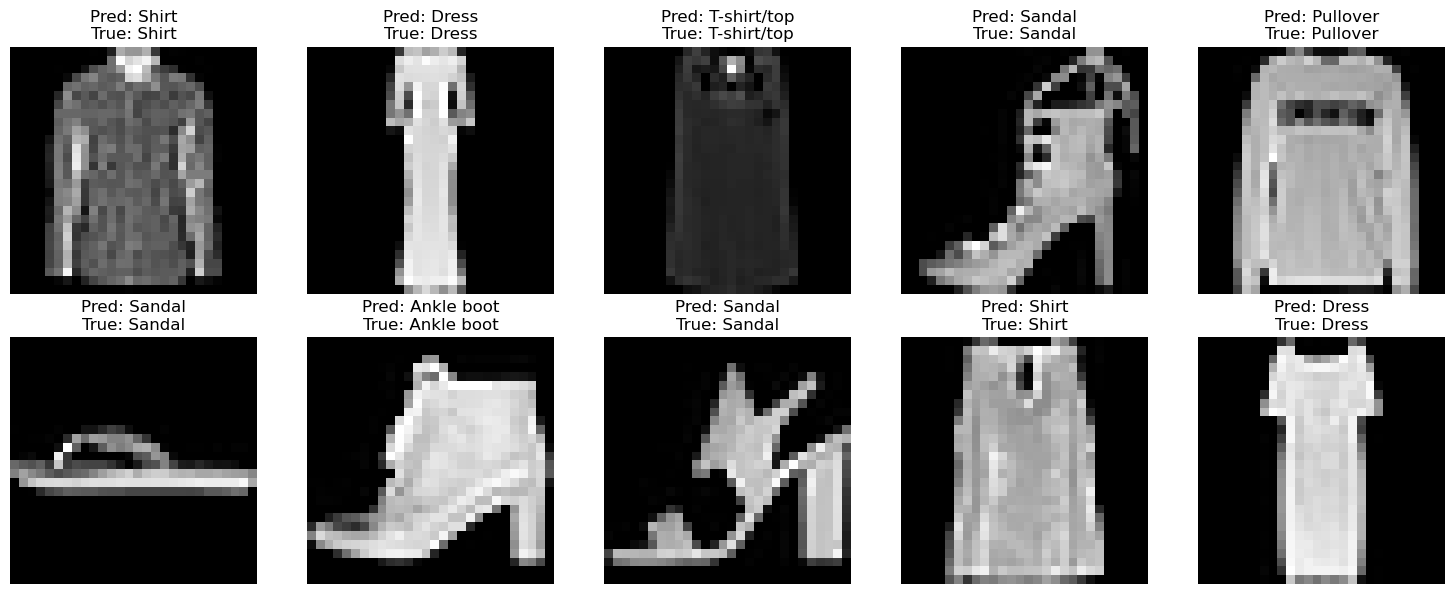

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Use the same indices you sampled
np.random.seed(42)
idxs = np.random.choice(len(X_test), size=10, replace=False)

# Prepare them for prediction (normalize + flatten)
samples = X_test_flat[idxs].astype("float32")

# Predict using your tuned model
preds = best_mlp_model.predict(samples_flat)

# Plot the images with predictions
plt.figure(figsize=(15, 6))
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap="gray")
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


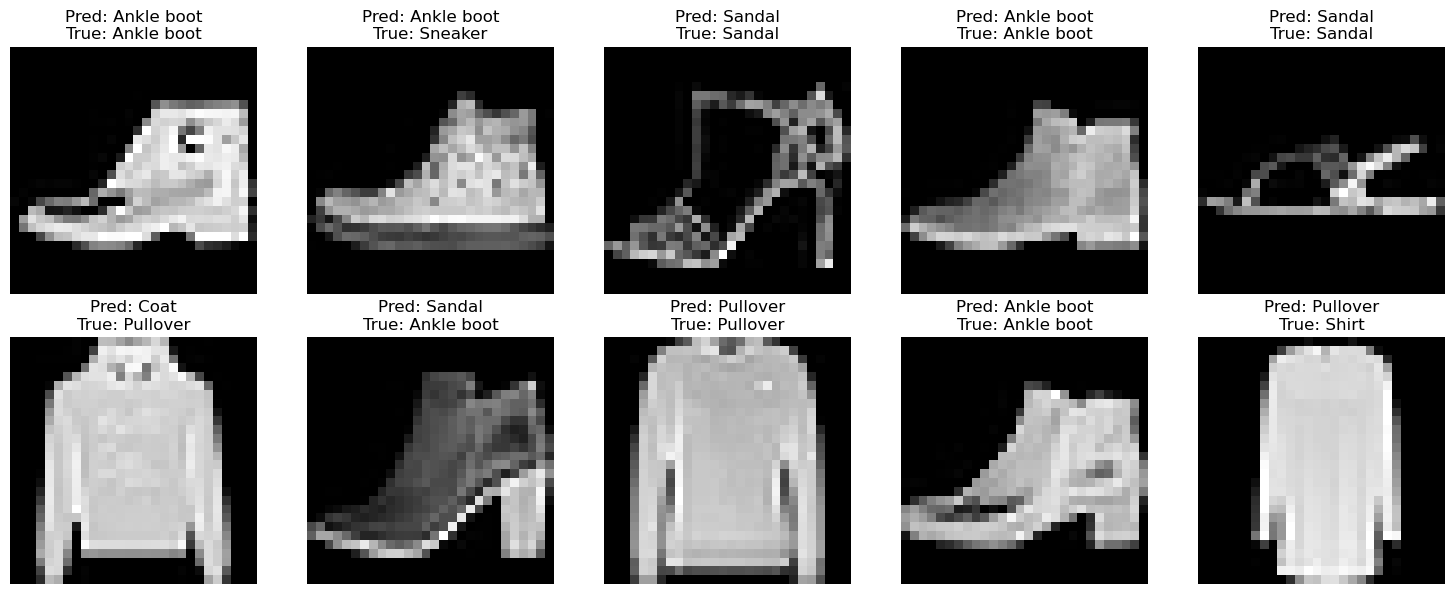

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# ✅ Pick 10 truly random samples each run
idxs = np.random.choice(len(X_test), size=10, replace=False)

# ✅ Preprocess (normalize + flatten)
samples_flat = X_test_flat[idxs]

# ✅ Predict using your best model
preds = best_mlp_model.predict(samples_flat)

# ✅ Show original images with predictions + true labels
plt.figure(figsize=(15, 6))
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap="gray")  # original image
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


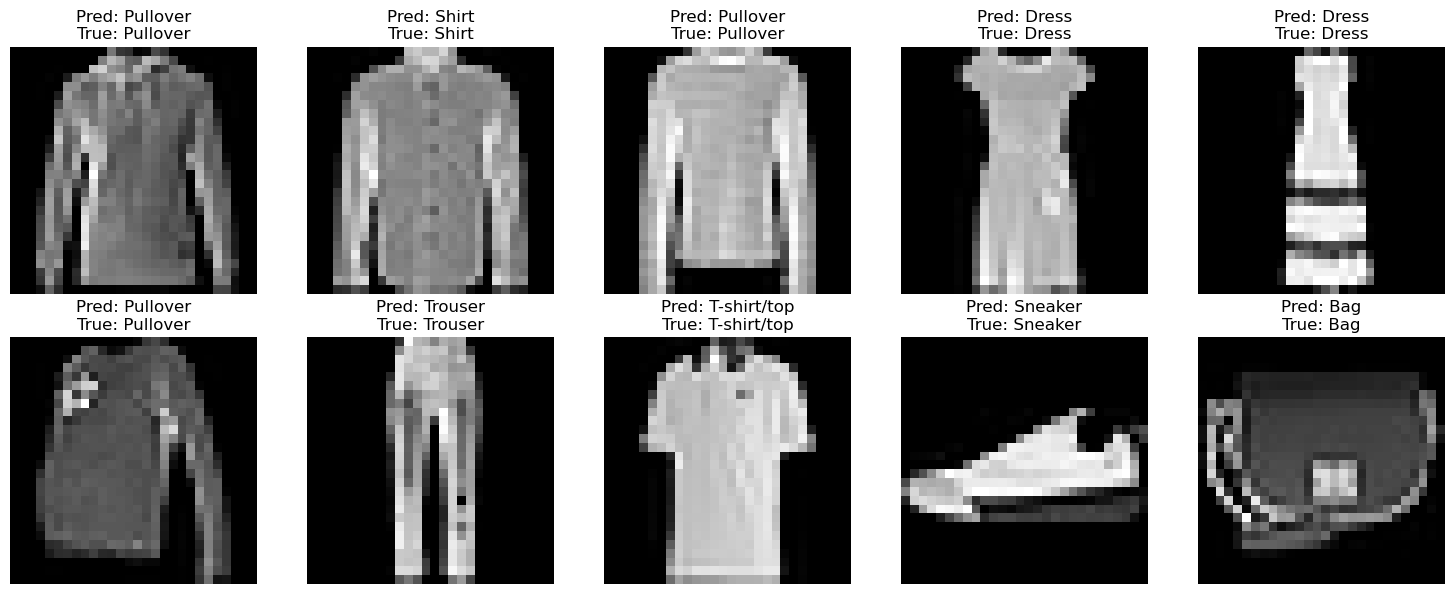

🎯 Accuracy on 10 random samples: 1.00


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score

# ✅ Pick 10 truly random samples each run
idxs = np.random.choice(len(X_test), size=10, replace=False)

# ✅ Preprocess (normalize + flatten)
samples_flat = X_test_flat[idxs]

# ✅ Predict using your best model
preds_out = best_mlp_model.predict(samples_flat)
# preds = np.argmax(preds_prob, axis=1)

# Handle if model outputs probabilities or direct class labels
if preds_out.ndim > 1:  # Probabilities case
    preds = np.argmax(preds_out, axis=1)
else:  # Already class labels
    preds = preds_out


# ✅ Show original images with predictions + true labels
plt.figure(figsize=(15, 6))
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap="gray")  # original image
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# ✅ Accuracy on these 10 samples
acc = accuracy_score(y_test[idxs], preds)
print(f"🎯 Accuracy on 10 random samples: {acc:.2f}")


In [51]:
import joblib

# Save the trained model
joblib.dump(best_mlp_model, "best_mlp_model.pkl")

# Load it later
best_mlp_model = joblib.load("best_mlp_model.pkl")


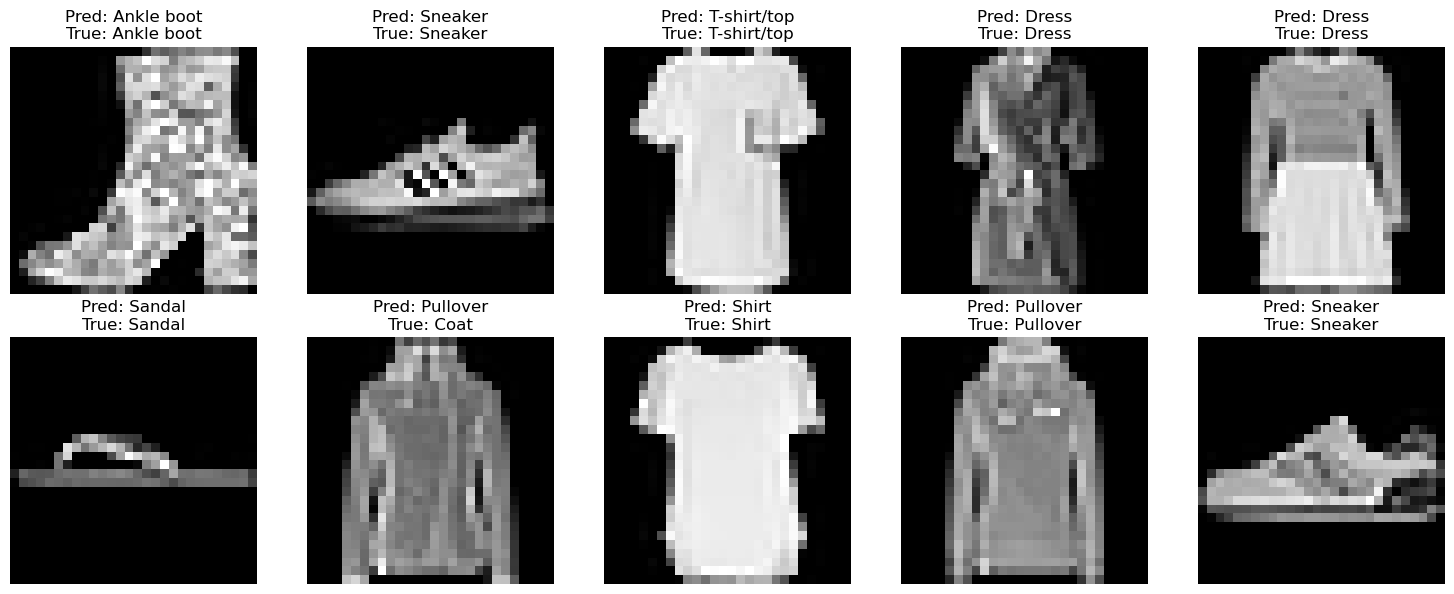

🎯 Accuracy on 10 random samples: 0.90


In [52]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score

# ✅ Pick 10 truly random samples each run
idxs = np.random.choice(len(X_test), size=10, replace=False)

# ✅ Preprocess (normalize + flatten)
samples_flat = X_test_flat[idxs]

# ✅ Predict using your best model
preds_out = best_mlp_model.predict(samples_flat)
# preds = np.argmax(preds_prob, axis=1)

# Handle if model outputs probabilities or direct class labels
if preds_out.ndim > 1:  # Probabilities case
    preds = np.argmax(preds_out, axis=1)
else:  # Already class labels
    preds = preds_out


# ✅ Show original images with predictions + true labels
plt.figure(figsize=(15, 6))
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap="gray")  # original image
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# ✅ Accuracy on these 10 samples
acc = accuracy_score(y_test[idxs], preds)
print(f"🎯 Accuracy on 10 random samples: {acc:.2f}")


In [54]:
# streamlit_fashion_mnist.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow import keras
import joblib

st.title("Fashion MNIST Random Sample Prediction")

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize and flatten for MLPClassifier
X_test_flat = X_test.reshape(-1, 784).astype("float32") / 255.0

# Load the trained MLP model (saved using joblib)
best_mlp_model = joblib.load("best_mlp_model.pkl")

# Fashion MNIST class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Pick 10 random samples
idxs = np.random.choice(len(X_test), size=10, replace=False)
samples_flat = X_test_flat[idxs]

# Predict
preds_out = best_mlp_model.predict(samples_flat)
if preds_out.ndim > 1:  # Probabilities case
    preds = np.argmax(preds_out, axis=1)
else:  # Direct class labels
    preds = preds_out

# Calculate accuracy
acc = accuracy_score(y_test[idxs], preds)

# Display accuracy
st.write(f"🎯 Accuracy on 10 random samples: {acc:.2f}")

# Plot images with predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    axes[i].imshow(X_test[idx], cmap="gray")
    axes[i].set_title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    axes[i].axis("off")
plt.tight_layout()
st.pyplot(fig)


2025-09-03 18:34:36.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:36.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:36.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:37.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:37.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:37.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:37.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 18:34:37.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [55]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import pickle

# ---------------- Load Fashion MNIST ---------------- #
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_test_flat = X_test.reshape(-1, 784).astype("float32") / 255.0

# Class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# ---------------- Load trained model ---------------- #
with open("best_mlp_model.pkl", "rb") as f:
    best_mlp_model = pickle.load(f)

st.title("Fashion MNIST Random Prediction")

# ---------------- Pick random 10 samples ---------------- #
idxs = np.random.choice(len(X_test), size=10, replace=False)
samples_flat = X_test_flat[idxs]

# ---------------- Predict ---------------- #
preds_out = best_mlp_model.predict(samples_flat)

# Handle probabilities or direct labels
if preds_out.ndim > 1:
    preds = np.argmax(preds_out, axis=1)
else:
    preds = preds_out

# ---------------- Display images ---------------- #
st.subheader("Randomly Selected Test Images with Predictions")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, (idx, pred) in enumerate(zip(idxs, preds)):
    ax = axes[i//5, i%5]
    ax.imshow(X_test[idx], cmap="gray")
    ax.set_title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    ax.axis("off")
st.pyplot(fig)

# ---------------- Accuracy ---------------- #
acc = accuracy_score(y_test[idxs], preds)
st.subheader(f"Accuracy on these 10 random samples: {acc:.2f}")


UnpicklingError: invalid load key, '\x00'.